Decisions Under Risk
======================

Shane Steinert-Threlkeld

S.N.M.Steinert-Threlkeld AT uva DOT nl

Recap
-----

* Decisions under ignorance: true state unknown, but so are the probabilities
* Many choice rules:
    - avoid dominance, maximin, leximin, maximax, optimism-pessimism, minimax regret
* Every rule seemed to have pros and cons.  Is there a single _correct_ (normatively) choice rule?

Outline
------

* Decisions under risk: probabilities known
* Choice rule: maximize _expected_ utility
* Justifying the MEU principle
    - What is utility?
    - What are the probabilities?
* Evidential versus Causal Decision Theory
* Problems for MEU

In [1]:
%%HTML
<style type="text/css">
.rendered_html tbody tr td:first-child {
    border-right: 1px solid black;
}
    
.rendered_html table {
    font-size: 28px;
}
</style>

Ride to Work Revisited
----------

| &#160; | rain | no rain |
| ----- | ----- | ----- |
| take clothes | 1 | 1 |
| leave clothes | 0 | 2 |

Ride to Work Revisited
----------

| &#160; | rain ($0.7$) | no rain ($0.3$) |
| ----- | ----- | ----- |
| take clothes | 1 | 1 |
| leave clothes | 0 | 2 |

(NB: we now assume that these utilities are _cardinal_, representing my actual values, not merely the ordering of my preferences over the outcomes.)

In [2]:
from collections import namedtuple

decision_problem = namedtuple(
    'decision_problem',
    ('states', 'actions', 'utilities', 'probabilities'),
    defaults=[None]
)

Maximize Expected Utility
---------

* Observation: for each $a$, $u( \cdot , a)$ is a _random variable_ with domain $S$ and range $\mathbb{R}$.
* For full generality, we assume that the function $p$ in the agent's decision problem works as follows: for each action $a$, $p_a$ is a probability distribution over the states $S$.  Intuitively, this assigns probabilities to statements of the form "if $a$, then $s$".  Much more on this later.

$$\text{MEU}(D) = \text{argmax}_a \mathbb{E}_{p_a} u(\cdot , a)$$

Intuitively: we weight the utilities of the action in each outcome by how probable that outcome is.

MEU in Python
------------

In [3]:
import numpy as np

ride_to_work = decision_problem(
    ('rain', 'no_rain'),
    ('take_clothes', 'leave_clothes'),
    np.array([
        [1, 1],
        [0, 2]
    ]),
    np.array([
        [0.7, 0.3],
        [0.7, 0.3]
    ])
)

In [4]:
def maximize_expected_utility(decision):
    weighted_utilities = decision.utilities * decision.probabilities  # element-wise multiplication
    expected_utilities = np.sum(weighted_utilities, axis=1)
    max_eu_act_idxs = np.where(expected_utilities == np.amax(expected_utilities))
    return list(np.array(decision.actions)[max_eu_act_idxs])

In [5]:
maximize_expected_utility(ride_to_work)

['take_clothes']

Where `maximin` and `maximax` differed on the ignorance version of this problem because of encoding "pessimistic" and "optimistic" outlooks, `meu` relies only on the agent's degrees of belief about the outcomes.

Irrelevant Alternatives are Irrelevant
----------

In [6]:
day_out = decision_problem(
    ('sun', 'sprinkle', 'thunderstorm'),
    ('play football', 'watch movie'),
    np.array([
        [15, 2, 6],
        [8, 10, 9]
    ]), 
    np.array([
        [0.2, 0.5, 0.3],
        [0.2, 0.5, 0.3]
    ])
)

In [7]:
maximize_expected_utility(day_out)

['watch movie']

This is the same verdict as `minimax_regret`.

In [8]:
day_out_redux = decision_problem(
    ('sun', 'sprinkle', 'thunderstorm'),
    ('play football', 'watch movie', 'picnic'),
    np.array([
        [15, 2, 6],
        [8, 10, 9],
        [20, 5, 0]
    ]), 
    np.array([
        [0.2, 0.5, 0.3],
        [0.2, 0.5, 0.3],
        [0.2, 0.5, 0.3]
    ])
)

In [9]:
maximize_expected_utility(day_out_redux)

['watch movie']

Adding the third option does not cause `meu` to favor football over the movie, contra `minimax_regret`.

Exercise: explain why this holds generally.

Justifying the Expected Utility Principle
----------

1. It's intuitive, and provides good results in a wide range of decision problems.

2. Long-run arguments: you will be better off in the long run if you follow it.

3. Grounding in rational preferences: if your preferences are rational, it is _as if_ you maximize expected utility.

Long-run argument
------

The (strong) law of large numbers: if $X_1 , X_2 , ...$ is an infinite sequence of independent and identically distributed (i.i.d.) random variables, then $$\text{Pr}\left( \lim_{n \to \infty} \frac{1}{n}\sum_{i=1}^n X_i = \mathbb{E}(X) \right) = 1$$

Applied to the random variable $u(\cdot , a)$ in a decision problem $D$, this result says: if you repeatedly make a choice in the same decision problem, your average return will almost surely be the expected utility.

So: you should try to maximize that quantity!

### Some objections:

* Keynes: "In the long run, we are all dead."
* While gambles arguably can, any important decisions (whether to take a job offer, or move to a new city, or...) simply cannot be repeated.

Grounding in Rational Preferences
------

* Main idea: _derive_ the MEU principle from other foundations.
* Typically: place constraints on what it means for a set of preferences to be rational.
* Prove a _representation theorem_: if an agent has rational preferences, they can be represented as acting in accord with MEU.

von Neumann-Morgenstern
-----

A lottery can be defined as follows:
* Any of some basic prizes are a lottery.
* If $L_1$ and $L_2$ are lotteries and $p \in (0, 1)$, then $pL_1/L_2$ is a lottery.
    - Flip a coin with weight $p$: if heads, play lottery $L_1$, else $L_2$
    
(Can generate any finite chance situation in this way.)

Revealing preferences over the basic prizes:

| &#160; | 1 |
| --- | --- |
| $L_1$ | bitterballen |
| $L_2$ | kaastengels |

Suppose you (like me) have $L_1 \preceq L_2$.  We can get more precise about how strong the preference is:

| &#160; | 0.25 | 0.75 |
| --- | --- | --- |
| $L_1$ | bitterballen | kaastengels |
| $L_2$ | chips | chips |

vN-M Representation Theorem
------

Axioms governing rational preferences between lotteries:

* Completeness: for all $L_1 , L_2$ either $L_1 \prec L_2$, $L_1 \succ L_2$, or $L_1 \sim L_2$

* Transitivity: if $L_1 \prec L_2$ and $L_2 \prec L_3$, then $L_1 \prec L_3$

* Continuity: if $L_1 \preceq L_2 \preceq L_3$, then there is a $p \in [0, 1]$ such that $pL_1/L_3 \sim L_2$

* Independence: if $L_1 \preceq L_2$, then for all $L_3$ and $p \in [0, 1]$, $pL_1/L_3 \preceq pL_2/L_3$

**Theorem:** If an agent's preferences satisfy the four axioms, there is a function $u$ from lotteries to real numbers such that $$L_1 \prec L_2 \text{ iff } \mathbb{E}[u(L_1)] < \mathbb{E}[u(L_2)]$$
Moreover, this $u$ is unique up to a linear transformation.

Discussion of vN-M
------

* What justifies the axioms on rational preference?
    - The money pump argument for transitivity. Suppose I have the following preferences
    
        \begin{align*}
        \text{Heineken} &\prec \text{IJwit} \\
        \text{IJwit} &\prec \text{Chouffe Bok} \\
        \text{Chouffe Bok} &\prec \text{Heineken}
        \end{align*}

        and that I already have a Heineken.  You can offer me to trade it for an IJwit for 25 cents.  Then I would also pay 25 cents to trade the IJwit for a Chouffe Bok.  Finally, I would trade that for a Heineken for 25 cents.
        
        I'm back to where I started, just poorer!

* Not all choices are over lotteries!
    - See Savage (1954), Jeffrey (1983), and Joyce (1999) for more general representation theorems in the same style.

What is utility?
-----

In [10]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

Text(0, 0.5, 'utility')

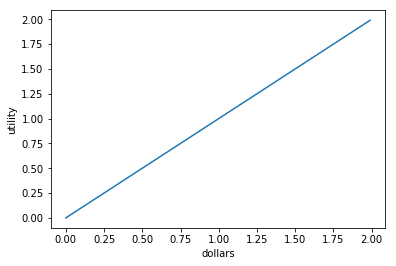

In [11]:
dollars = np.arange(0, 2, 0.01)
linear_utility = dollars
plt.plot(dollars, linear_utility)
plt.xlabel("dollars")
plt.ylabel("utility")

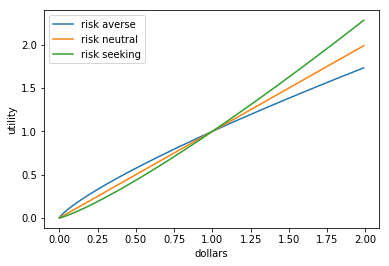

In [12]:
averse_utility = dollars**0.8
seeking_utility = dollars**1.2
plt.plot(dollars, averse_utility, label="risk averse")
plt.plot(dollars, linear_utility, label="risk neutral")
plt.plot(dollars, seeking_utility, label="risk seeking")
plt.xlabel("dollars")
plt.ylabel("utility")
plt.legend()

What is utility? Kahneman and Tversky's Prospect Theory
------

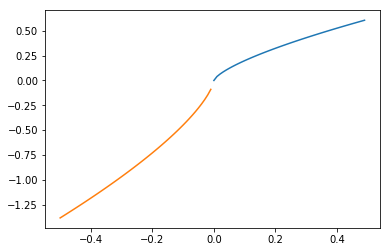

In [13]:
gains = np.arange(0, 0.5, 0.01)
losses = np.arange(-0.5, 0, 0.01)

alpha = 0.7
lambda_param = 2.25

plt.plot(gains, gains**alpha)
plt.plot(losses, -lambda_param*(-losses)**alpha)

What are the probabilities?
------

* Classical: "The theory of chance consists in reducing all the events of the same kind to a certain number of cases equally possible" (Laplace)

* Logical: measures _evidential support_ between evidence and hypothesis

* Frequentist: probabilities measure the frequency with which certain events occur

* Subjective: they are an agent's _degree of belief_
    
    This is the notion that we are using in this class.

Evidential vs. Causal Decision Theory
------

* What are the probabilities?
    - Subjective degrees of belief
    
* Still open: _which_ probabilities?
    - How do we specify what $p_a$ is for each act in a decision problem?
    - It turns out that a lot hinges on the answer to this question.
    - EDT and CDT are distinguished exactly by how they answer it.

Newcomb's Problem
-------

Before you are two boxes, one transparent and one opaque.  Inside the transparent box is 1,000 euros.  You can choose to receive the contents of both boxes ("two-box") or only the contents of the opaque box ("one-box").  The opaque box was filled yesterday, its contents yesterday by a very good predictor.  If they predicted that you will two-box, the opaque box is empty.  If they predicted that you will one-box, the opaque box has 1,000,000 euros in it.  

So: two-box or one-box?

| &#160; | predicted one-box | predicted two-box |
| --- | --- | --- |
| one-box | 1,000,000 | 0 |
| two-box | 1,001,000 | 1,000 |

* Two-box! It strictly dominates one-boxing.  Plus, the contents of the opaque box are already fixed.

* One-box! That makes it much more likely that I'll get a million euros.

Two Views
-----

* Evidential Decision Theory: $$p_a(s) := p(s | a)$$

    This is sometimes called the "news value" of an action: what evidence about the state does it provide.
    
    Intuitively: $p(\text{predict one-box} | \text{one-box})$ is very high, so you should one-box.

* Causal Decision Theory: $$p_a(s) := p(a > s)$$

    where "$a > s$" is the _counter-factual_ conditional "If I had done $a$, then $s$ would have obtained."
    
    A concrete proposal: $p(a > s) := p(s | \text{do}(a))$.
    
    Intuitively: $p(\text{predict one-box} | \text{do}(\text{one-box})) = p(\text{predict one-box})$, so you should two-box.

Implementing the Two Views
-----

* By way of concrete implementation, we will make the two views more precise.
* Using [Pyro](http://pyro.ai/), a universal _probabilistic programming langauge_ (PPL)
    - Allows free mixing of stochastic primitives with native Python
    - Easy specification of complex generative probabilistic models
    - Most importantly: `pyro.condition` and `pyro.do`
* Such tools are becoming increasingly useful in AI, so exposure to it will likely help you in the future.

The Basic Newcomb Model
-------

In [14]:
import math
import torch
import pyro
import pyro.distributions as dist

def newcomb(prob_two_box=0.99, accuracy=0.99):

    # 'raw facts' about agent, used by the predictor and causing the act
    predisposition = pyro.sample('predisposition',
                                 dist.Bernoulli(prob_two_box)).item()

    # whether the Bernoulli should be p or (1-p)
    predict_act_prob = (
        math.sqrt(accuracy)*(predisposition == 1.) +
        (1 - math.sqrt(accuracy))*(predisposition == 0.))

    act = pyro.sample('act', dist.Bernoulli(predict_act_prob))
    prediction = pyro.sample('prediction', dist.Bernoulli(predict_act_prob))

    return prediction

In [15]:
def name(value):
    return 'two_box' if value == 1. else 'one_box'

print([name(newcomb().item()) for _ in range(100)])

['two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'one_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box', 'two_box'

Conditioning and Intervening
-------

In [16]:
def get_marginal_distribution(model, num_samples):
    return pyro.infer.EmpiricalMarginal(
                pyro.infer.Importance(model, num_samples=num_samples).run())

def conditioned_marginal(model, data, num_samples=2000):
    conditioned = pyro.condition(model, data=data)  # conditioning!
    return get_marginal_distribution(conditioned, num_samples)

def intervened_marginal(model, data, num_samples=2000):
    intervened = pyro.do(model, data=data)  # intervening!
    return get_marginal_distribution(intervened, num_samples)

In [17]:
one_box_act = {'act': 0.0}
two_box_act = {'act': 1.0}

conditioned_one_box = conditioned_marginal(newcomb, data=one_box_act)
print([name(conditioned_one_box().item()) for _ in range(100)])

['one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'two_box', 'one_box', 'one_box', 'one_box', 'two_box', 'two_box', 'one_box', 'one_box', 'two_box', 'one_box', 'one_box', 'one_box', 'two_box', 'two_box', 'one_box', 'one_box', 'two_box', 'one_box', 'two_box', 'two_box', 'two_box', 'one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'two_box', 'one_box', 'two_box', 'one_box', 'two_box', 'one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'two_box', 'one_box', 'two_box', 'one_box', 'one_box', 'two_box', 'two_box', 'one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'one_box', 'two_box', 'one_box', 'one_box', 'one_box', 'two_box', 'one_box', 'two_box', 'one_box', 'one_box', 'two_box', 'one_box', 'two_box', 'one_box', 'two_box', 'one_box', 'two_box', 'one_box', 'one_box', 'two_box', 'one_box', 'one_box', 'one_box', 'two_box', 'one_box', 'one_box', 'two_box', 'one_box', 'one_box'

The Evidential Decision Theory Verdict
--------

In [18]:
conditioned_dists = [
    conditioned_marginal(newcomb, data=act)
    for act in [one_box_act, two_box_act]
]
conditioned_probs = np.array([
    [math.exp(dist.log_prob(prediction)) for prediction in [0.0, 1.0]]
    for dist in conditioned_dists
])
print(conditioned_probs)

[[0.70845525 0.2915448 ]
 [0.00406814 0.99593229]]


In [19]:
newcomb_edt = decision_problem(
    ('predict_one_box', 'predict_two_box'),
    ('one_box', 'two_box'),
    np.array([
        [1000000, 0],
        [1001000, 1000]
    ]),
    conditioned_probs
)
maximize_expected_utility(newcomb_edt)

['one_box']

The Causal Decision Theory Verict
-------

In [20]:
intervened_dists = [
    intervened_marginal(newcomb, data=act)
    for act in [one_box_act, two_box_act]
]
intervened_probs = np.array([
    [math.exp(dist.log_prob(prediction)) for prediction in [0.0, 1.0]]
    for dist in intervened_dists
])
print(intervened_probs)

[[0.018      0.98199982]
 [0.0175     0.98250004]]


In [21]:
newcomb_cdt = decision_problem(
    ('predict_one_box', 'predict_two_box'),
    ('one_box', 'two_box'),
    np.array([
        [1000000, 0],
        [1001000, 1000]
    ]),
    intervened_probs
)
maximize_expected_utility(newcomb_cdt)

['two_box']

Some Problems for MEU
------

Allais' Paradox and the Sure-Thing Principle
-------

Would you prefer a ticket from Gamble 1 or Gamble 2?

| &#160; | no. 1 | no. 2-11 | no. 12-100 |
| --- | --- | --- | ---|
| Gamble 1 | 1,000,000 | 1,000,000 | 1,000,000 |
| Gamble 2 | 0 | 5,000,0000 | 1,000,000 |

Would you prefer a ticket from Gamble 3 or Gamble 4?

| &#160; | no. 1 | no. 2-11 | no. 12-100 |
| --- | --- | --- | ---|
| Gamble 3 | 1,000,000 | 1,000,000 | 0 |
| Gamble 4 | 0 | 5,000,0000 | 0 |

**Problem**: The judgments $G_1 \succ G_2$ and $G_4 \succ G_3$ are inconsistent with maximizing expected utility.

Transformative Decisions
--------

(See Laurie Paul's recent book _Transformative Experience_.) Consider the following decisions:
* whether to try bitterballen for the first time
* whether to go to graduate school or not
* whether to have your first child

| &#160; | actual world |
| --- | --- |
| try | get bitterballen |
| don't try | status quo |

* What is $u(@, bb)$?
* When an experience transforms you, your utilities change.  Which ones should be used to evaluate the choice?